In [10]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint


import matplotlib.pyplot as plt
from nsepy.archives import get_price_history
from datetime import date

%matplotlib inline

In [4]:
S1 = get_price_history(stock = 'SBIN', 
                        start = date(2016,1,1), 
                        end = date(2016,9,6))

S2 = get_price_history(stock = 'ICICIBANK', 
                        start = date(2016,1,1), 
                        end = date(2016,9,6))

result = coint(S1[['Close']], S2[['Close']])
score = result[0]
pvalue = result[1]

In [5]:
pvalue

0.032682818767902716

In [8]:
(S2).tail

<bound method NDFrame.tail of             Previous    Open    High     Low    Last   Close    VWAP  \
2016-01-01    261.35  261.30  263.60  258.00  262.55  263.00  261.32   
2016-01-04    263.00  261.00  261.35  254.65  256.00  255.55  256.72   
2016-01-05    255.55  256.25  257.50  251.70  257.05  256.70  255.06   
2016-01-06    256.70  255.40  256.75  249.20  250.20  250.10  252.45   
2016-01-07    250.10  246.40  247.70  243.10  247.10  246.75  245.24   
2016-01-08    246.75  244.50  247.80  243.45  245.50  245.05  245.98   
2016-01-11    245.05  241.90  243.90  238.05  239.95  239.45  240.74   
2016-01-12    239.45  241.00  241.85  235.60  238.10  236.75  237.64   
2016-01-13    236.75  237.80  242.90  231.10  238.45  239.50  236.96   
2016-01-14    239.50  234.20  239.80  231.80  235.50  235.75  235.65   
2016-01-15    235.75  235.60  236.30  221.75  225.40  224.45  228.20   
2016-01-18    224.45  224.20  228.70  217.80  224.10  223.10  223.20   
2016-01-19    223.10  224.65  231.

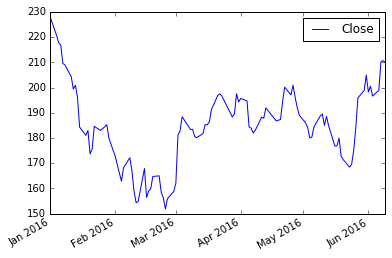

In [11]:
S1[['Close']].plot()

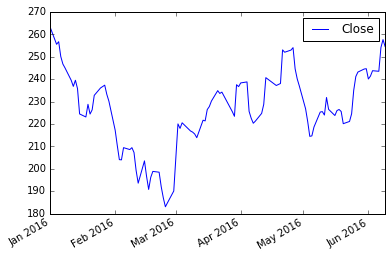

In [12]:
S2[['Close']].plot()

In [13]:
score, pvalue, _ = coint(S1[['Close']], S2[['Close']])
pvalue

0.032682818767902716

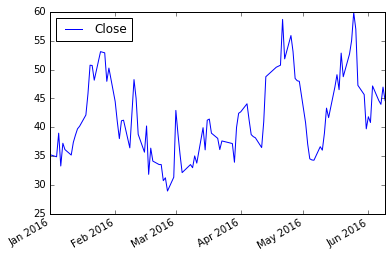

In [14]:
diff_series= S2[['Close']] - S1[['Close']]
diff_series.plot()

In [15]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

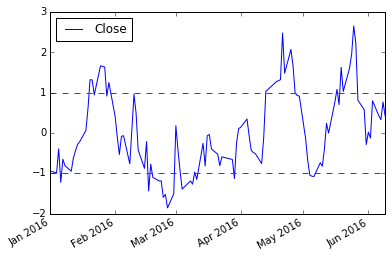

In [16]:
zscore(diff_series).plot()
#plt.axhline(zscore(diff_series).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')

Simple Strategy:
Go "Long" the spread whenever the z-score is below -1.0 
Go "Short" the spread when the z-score is above 1.0 
Exit positions when the z-score approaches zero 

Since we originally defined the "spread" as S1-S2, "Long" the spread would mean "Buy 1 share of S1, and Sell Short 1 share of S2" (and vice versa if you were going "Short" the spread)